https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [18]:
# load data
import pandas
import numpy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [19]:
#Chi square

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_oneway

# feature extraction
test = SelectKBest(score_func=f_oneway, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[   810.515  10914.673   9685.068   1228.842    365.015  12326.398
     34.405   5997.833]
[[ 148.    72.    33.6   50. ]
 [  85.    66.    26.6   31. ]
 [ 183.    64.    23.3   32. ]
 [  89.    66.    28.1   21. ]
 [ 137.    40.    43.1   33. ]]


In [19]:
dataframe.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

# Recursive Feature Elimination.

In [7]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)
print("Selected Features:",fit.support_)
print("Feature Ranking:",fit.ranking_)


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


# Feature Importance.

In [10]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(sorted(model.feature_importances_))

[0.075436250028571669, 0.081406679306566559, 0.11198142822576056, 0.11722168928110963, 0.12153673736885109, 0.12247597414878866, 0.13457184808663991, 0.23536939355371192]


In [ ]:
#F classif

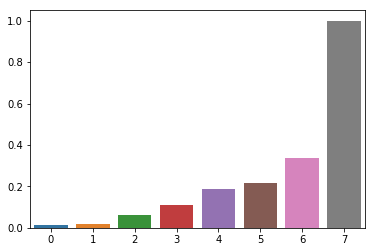

In [11]:
import numpy as np

from sklearn.feature_selection import f_classif,mutual_info_classif

f_test,_=f_classif(X, Y)
f_test/=np.max(f_test)
import operator
d1=dict(zip(dataframe.columns,f_test))

sorted_x = sorted(d1.items(), key=operator.itemgetter(1))
col=sorted_x
k=[]
v=[]
for i in col :
    k.append(i[0])
    v.append(i[1])
import seaborn as sns

r=list(range(len(k)))
sns.barplot(r,v)

In [12]:
k

['pres', 'skin', 'test', 'pedi', 'preg', 'age', 'mass', 'plas']

In [13]:
#mutual_info_classif

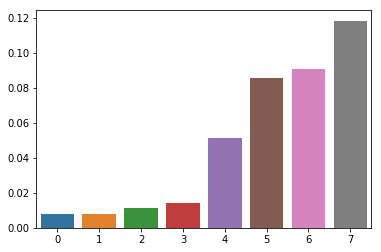

In [15]:
from sklearn.feature_selection import f_classif,mutual_info_classif

mi=mutual_info_classif(X, Y)

import operator
d2=dict(zip(dataframe.columns,mi))

sorted_x = sorted(d2.items(), key=operator.itemgetter(1))
col=sorted_x
k=[]
v=[]
for i in col :
    k.append(i[0])
    v.append(i[1])
import seaborn as sns

r=list(range(len(k)))
sns.barplot(r,v)

In [16]:
k

['pres', 'skin', 'pedi', 'preg', 'test', 'age', 'mass', 'plas']